# Z score distribution plots

## Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.stats import norm

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


## Load data

In [2]:
z_dist = pd.read_csv("../outputs/expected_variants_all_regions_stats.tsv", sep="\t")

## Nonsense Z score by region

In [3]:
def plot_z_dist(
    df,
    ax,
    csq="nonsense",
    region="nmd_target",
    title="NMD target",
    FDR_line=True,
    FDR_label=False,
):

    # Subset the data
    m1 = df["region"] == region
    m2 = df["csq"] == csq
    df = df[m1 & m2]

    # Find the highest P value which remains significant after FDR correction
    m3 = df["fdr_p"] < 0.05
    max_p = df[m3]["p"].max()
    sig_thresh = norm.isf(1 - max_p)

    # Create the plot
    ax = sns.kdeplot(ax=ax, x=df["z"], gridsize=1000, fill=False)

    # Adjust axes
    ax.set_xlim(-5, 5)
    ax.set_xlabel("Z score")
    ax.set_ylabel(None)
    ax.set_title(title)

    # Extract KDE line data
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()

    # Add fill beneath KDE line
    ax.fill_between(xs, 0, ys, alpha=0.2)

    # Add line for FDR threshold
    if FDR_line:
        # Find y intercept
        y_val = np.interp(sig_thresh, xs, ys)
        ax.vlines(
            x=sig_thresh,
            ymin=0,
            ymax=y_val,
            color=C.black,
            linestyle="--",
            label="FDR < 0.05",
        )

    if FDR_label:
        ax.text(
            x=sig_thresh,
            y=0.01,
            ha="center",
            va="bottom",
            s="\n\nFDR < 0.05",
            rotation=90,
            # transform=ax.get_xaxis_transform(),
        )

    # Count regions where a Z score can be calculated
    N = len(df.dropna(subset="z"))
    ax.text(x=1, y=0.9, s=f"N = {N:,}", ha="right", va="top", transform=ax.transAxes)

    return None

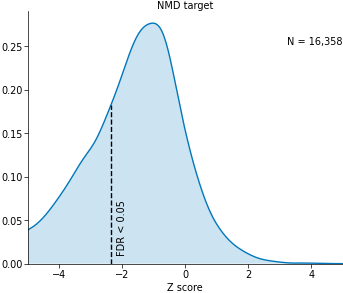

In [4]:
fig, ax = plt.subplots(layout="constrained")
plot_z_dist(z_dist, ax, FDR_label=True, region="nmd_target")